In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

import acgan
import tqdm
import twodlearn as tdl
import tensorflow as tf
import tensorflow_datasets as tfds
from functools import reduce
import matplotlib.pyplot as plt
BATCH_SIZE = 64
#acgan.data.DATA_DIR = '/data/marinodl/tensorflow_datasets'
session = tf.InteractiveSession()


In [2]:
dataset = acgan.data.load_celeb_a(BATCH_SIZE)
# dataset = acgan.data.load_mnist(BATCH_SIZE)
input_shape = dataset.output_shapes.as_list()
print('input shape: {}'.format(input_shape))

Instructions for updating:
Colocations handled automatically by placer.


W0330 02:34:52.717474 140024873277248 deprecation.py:323] From /home/marinodl/research/2019/AssociativeGAN/env/lib/python3.6/site-packages/tensorflow/python/ops/control_flow_ops.py:423: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


input shape: [None, 64, 64, 3]


In [3]:
model = acgan.model.MSG_GAN(
    embedding_size=100,
    generator={'init_shape':(8, 8, 256),
               'units': [512, 216, 3],
               'kernels': 3,
               'strides': [2, 2, 2],
               'padding': ['same', 'same', 'same', 'same']},
    discriminator={'units':[128, 256],
                   'kernels':3,
                   'strides':2,
                   'dropout':None}
)
model.noise_rate.init(rate=0.001)
print('output shape: {}'.format(
    model.generator.compute_output_shape(
        input_shape=[None, 100])))

output shape: (?, 64, 64, 3)


In [4]:
iter = dataset.make_one_shot_iterator()
xreal = iter.get_next()

gen = model.generator_trainer(BATCH_SIZE, learning_rate=0.0002)
dis = model.discriminator_trainer(BATCH_SIZE, xreal=xreal, learning_rate=0.0002)
tdl.core.variables_initializer(gen.variables).run()
tdl.core.variables_initializer(dis.variables).run()

Instructions for updating:
Use tf.cast instead.


W0330 02:34:57.393482 140024873277248 deprecation.py:323] From /home/marinodl/research/2019/AssociativeGAN/env/lib/python3.6/site-packages/tensorflow/python/keras/utils/losses_utils.py:170: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


W0330 02:34:57.420963 140024873277248 deprecation.py:323] From /home/marinodl/research/2019/AssociativeGAN/env/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


In [5]:
dis.xreal.shape.as_list()

[None, 64, 64, 3]

In [6]:
model.image_pyramid.init()

In [7]:
model.image_pyramid.scales

[[2, 2], [2, 2], [2, 2]]

In [8]:
print('step {} | dis {} | gen {}'.format(dis.train_step.eval(), dis.loss.eval(), gen.loss.eval()) )

step 0 | dis 0.702041506767273 | gen 0.6931020021438599


In [9]:
acgan.train.run_training(dis=dis, gen=gen, n_steps=1000, n_logging=10)

step 67 | dis 0.0468 | gen 5.5326 : : 2002it [02:58, 10.72it/s]


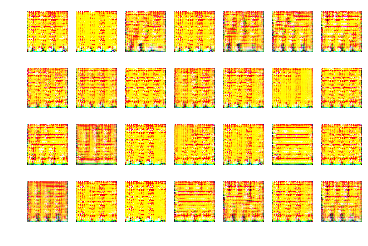

In [9]:
import matplotlib.pyplot as plt
import numpy as np
xsim = dis.xsim.eval()
for i in range(4*7):
    plt.subplot(4,7, i+1)
    plt.imshow(np.squeeze((xsim[i][:,:,:]+1)*0.5))
    plt.axis('off')

In [21]:
model.generator.layers

In [23]:

(1, 3) == (1, 3)

True

In [26]:
64//32

2

In [18]:
tf.TensorShape([None,2,3]).as_list() == tf.TensorShape([None,2,3]).as_list()

True

In [19]:
import unittest

In [ ]:
unittest.